<a href="https://colab.research.google.com/github/shubhangi0301/Machine-Learning-PG/blob/main/PAT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shubhangi Rastogi**
###**23MCA0200**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

For the assignment, we'll choose the 'Wine-quality' dataset. This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality.

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

In [49]:
my_data = pd.read_csv('/content/winequality-red.csv')
my_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
my_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
my_data.shape
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
my_data.isnull().sum()                        #checking for null/missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

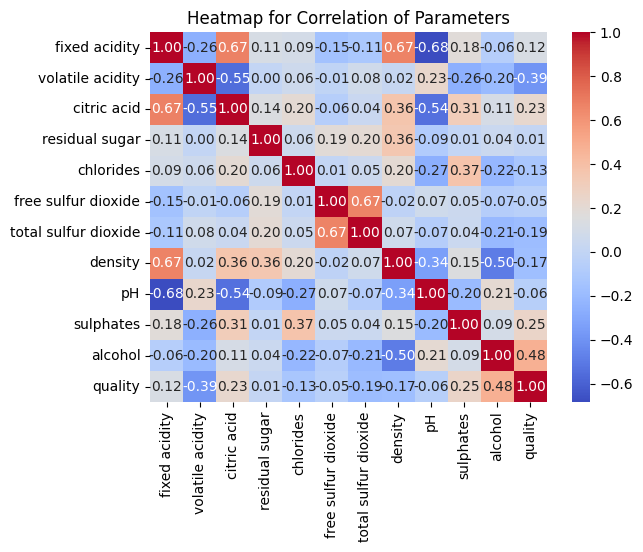

In [53]:
corr = my_data[my_data.columns].corr()
sns.heatmap(corr, cmap="coolwarm", annot = True,fmt=".2f")
plt.title('Heatmap for Correlation of Parameters')
plt.show()

In [54]:
X = my_data[['fixed acidity','citric acid','residual sugar','sulphates','alcohol']]
X

,fixed acidity,citric acid,residual sugar,sulphates,alcohol
0,7.4,0.00,1.9,0.56,9.4
1,7.8,0.00,2.6,0.68,9.8
2,7.8,0.04,2.3,0.65,9.8
3,11.2,0.56,1.9,0.58,9.8
4,7.4,0.00,1.9,0.56,9.4
...,...,...,...,...,...
1594,6.2,0.08,2.0,0.58,10.5
1595,5.9,0.10,2.2,0.76,11.2
1596,6.3,0.13,2.3,0.75,11.0
1597,5.9,0.12,2.0,0.71,10.2


In [55]:
my_data["Good wine"] = ["Yes" if i > 7 else "No" for i in my_data['quality']]
y = my_data["Good wine"]
y

0       No
1       No
2       No
3       No
4       No
        ..
1594    No
1595    No
1596    No
1597    No
1598    No
Name: Good wine, Length: 1599, dtype: object

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape


(1279, 5)

In [57]:
X_test.shape

(320, 5)

In [58]:
scaler=StandardScaler()

scaler_X_train=scaler.fit_transform(X_train)

scaler_X_train

array([[ 0.21833164,  0.19209222,  0.30972563,  0.45822284,  1.12317723],
       [-1.29016623,  0.65275338, -0.80507963, -0.40119696,  1.40827174],
       [ 1.49475291,  1.01104539, -0.52637831,  0.51551749, -0.58738978],
       ...,
       [-0.65195559, -1.08752211,  0.10069964, -0.68767023, -0.87248428],
       [-0.24582155,  0.39683051, -0.59605364,  0.80199076,  1.40827174],
       [-1.46422367, -0.06383064, -0.59605364, -0.68767023,  2.92877575]])

In [59]:
scaler_X_test=scaler.transform(X_test)

scaler_X_test

array([[-3.61859850e-01, -9.85152962e-01, -3.86510130e-02,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -5.24491803e-01, -6.65728970e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00, -2.68568937e-01,  1.00699644e-01,
         1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02, -1.15015218e-01, -2.47676999e-01,
        -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01,  6.01568807e-01, -3.87027656e-01,
         1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01, -1.18989125e+00, -6.65728970e-01,
        -6.87670232e-01, -6.82421281e-01]])

In [60]:
classifiers_dict = {
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (Poly)': SVC(kernel='poly', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLPC': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [61]:
for name,clf in classifiers_dict.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(scaler_X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  metrics['Accuracy'].append(accuracy)
  metrics['Precision'].append(precision)
  metrics['Recall'].append(recall)
  metrics['F1 Score'].append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

In [62]:
for metric_name, metric_values in metrics.items():
    print(f"{metric_name}:")
    for classifier_name, value in zip(classifiers_dict.keys(), metric_values):
        print(f"{classifier_name}: {value:.4f}")
    print()


Accuracy:
SVM (Linear): 0.9844
SVM (Poly): 0.9844
SVM (RBF): 0.9844
SVM (Sigmoid): 0.9844
KNN: 0.9844
Decision Tree: 0.9844
MLPC: 0.9750
Naive Bayes: 0.9844

Precision:
SVM (Linear): 0.9846
SVM (Poly): 0.9846
SVM (RBF): 0.9846
SVM (Sigmoid): 0.9846
KNN: 0.9846
Decision Tree: 0.9846
MLPC: 0.9688
Naive Bayes: 0.9846

Recall:
SVM (Linear): 0.9844
SVM (Poly): 0.9844
SVM (RBF): 0.9844
SVM (Sigmoid): 0.9844
KNN: 0.9844
Decision Tree: 0.9844
MLPC: 0.9750
Naive Bayes: 0.9844

F1 Score:
SVM (Linear): 0.9766
SVM (Poly): 0.9766
SVM (RBF): 0.9766
SVM (Sigmoid): 0.9766
KNN: 0.9766
Decision Tree: 0.9766
MLPC: 0.9719
Naive Bayes: 0.9766



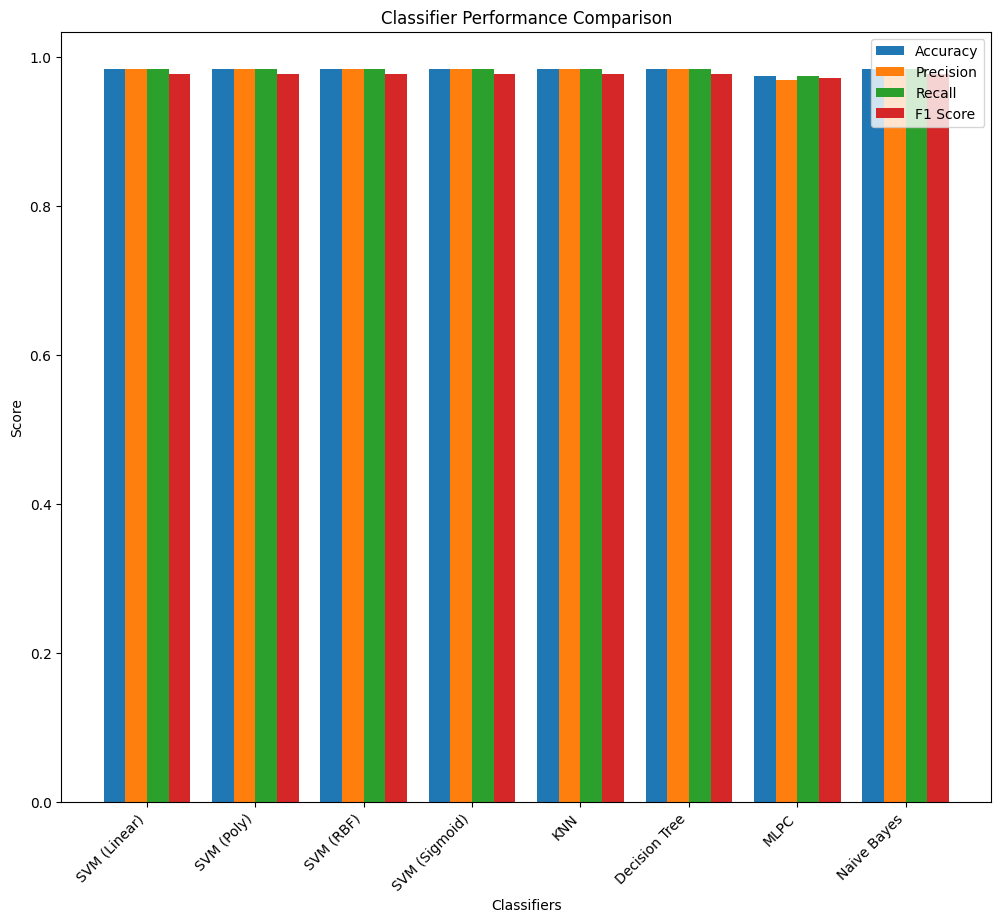

In [64]:
# Plotting
plt.figure(figsize=(12, 10))
bar_width = 0.2
index = np.arange(len(classifiers_dict))
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    plt.bar(index + i * bar_width, metric_values, bar_width, label=metric_name)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, classifiers_dict.keys(), rotation=45, ha='right')
plt.legend()
plt.show()